# Prac 08.1

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from time import time

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

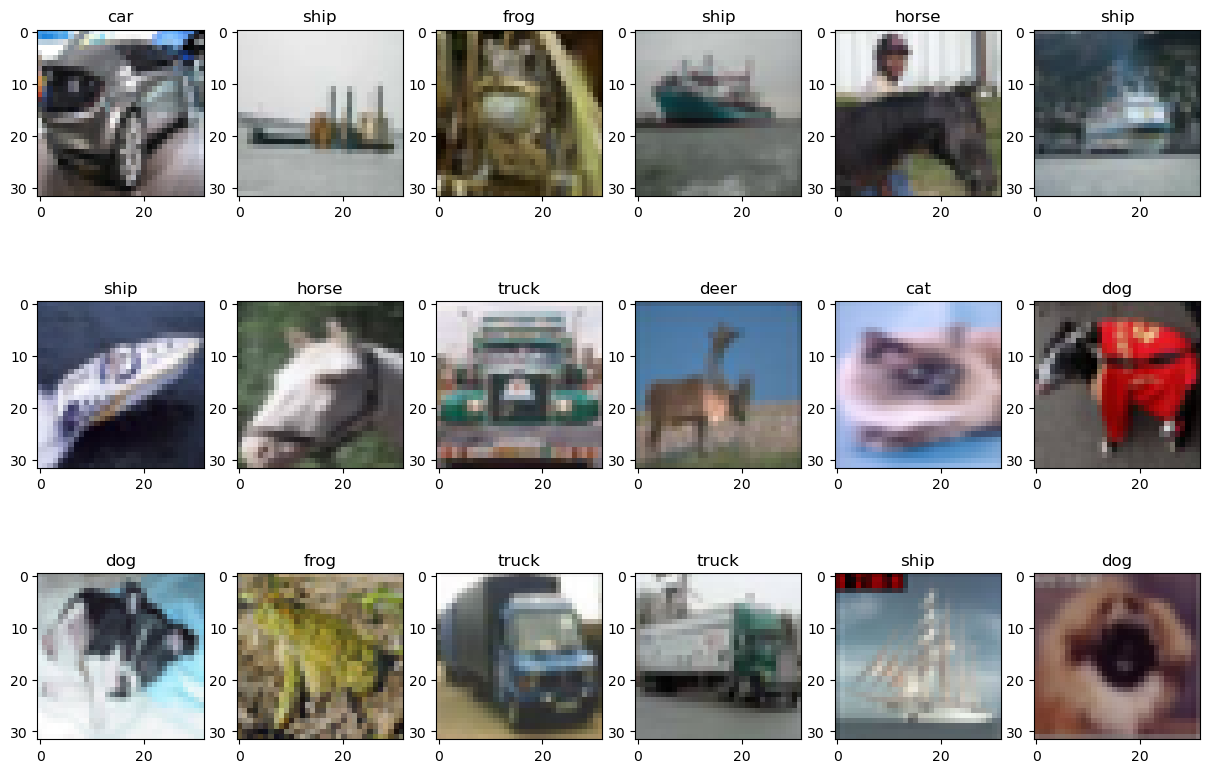

In [26]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

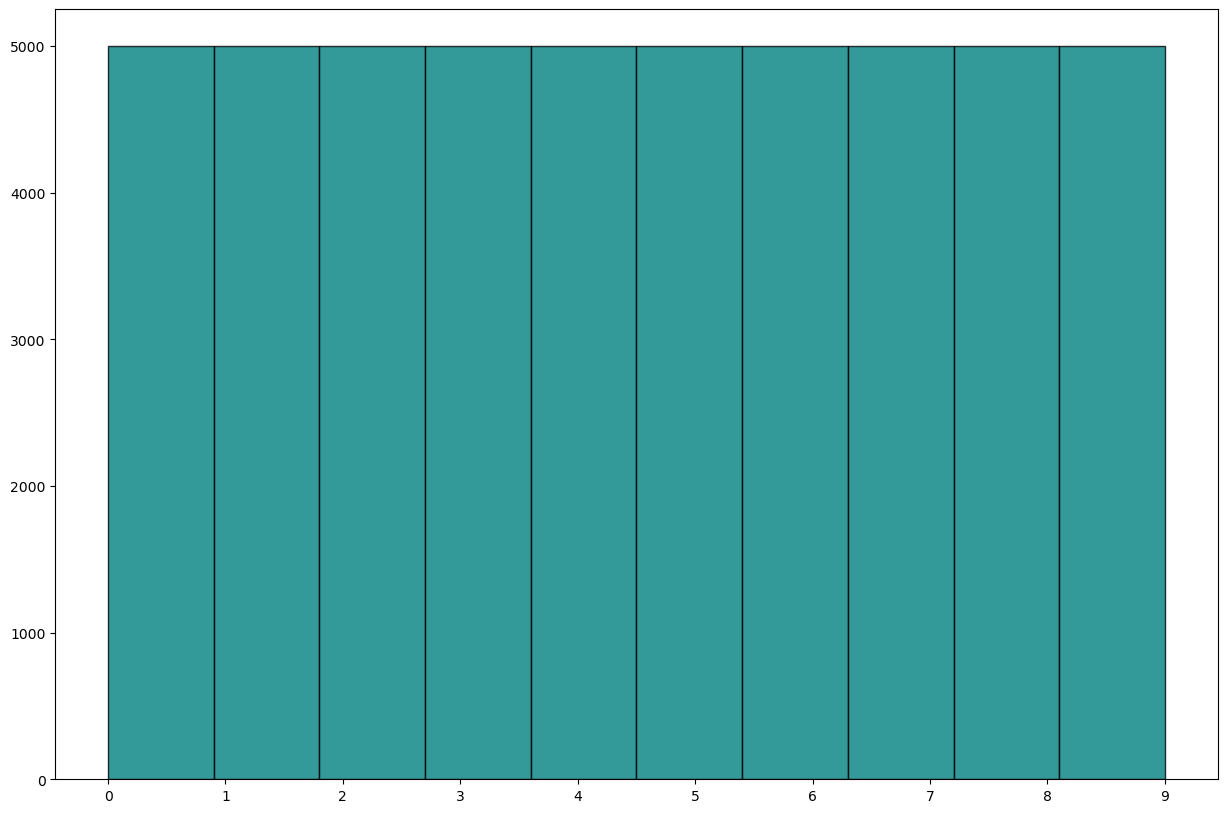

In [27]:
# Compute the class histogram

plt.hist(y_train, bins=10, edgecolor="black", color="teal", alpha=0.8)
plt.xticks(np.arange(10), np.arange(10))
plt.show()

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [28]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [24]:
# Build the classifier
model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten the 3D output to a 1D vector for the Dense layers
    Flatten(),
    
    # Fully Connected (Dense) Layers
    Dense(128, activation='relu'),
    # Dropout (optional, but good practice for regularization)
    Dropout(0.5), 
    
    # Output Layer: 10 units for 10 classes, using softmax
    Dense(num_classes, activation='softmax')
])

# Show the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 128)              

### Step 3: Training

Compile the model and train it.

In [29]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/25
391/391 [==============================] - 1s 3ms/step - loss: 1.7628 - accuracy: 0.3538 - val_loss: 1.3823 - val_accuracy: 0.5098
Epoch 2/25
391/391 [==============================] - 1s 3ms/step - loss: 1.3963 - accuracy: 0.5026 - val_loss: 1.2357 - val_accuracy: 0.5617
Epoch 3/25
391/391 [==============================] - 1s 3ms/step - loss: 1.2656 - accuracy: 0.5512 - val_loss: 1.1221 - val_accuracy: 0.6034
Epoch 4/25
391/391 [==============================] - 1s 3ms/step - loss: 1.1784 - accuracy: 0.5829 - val_loss: 1.0341 - val_accuracy: 0.6373
Epoch 5/25
391/391 [==============================] - 1s 3ms/step - loss: 1.1126 - accuracy: 0.6087 - val_loss: 1.0223 - val_accuracy: 0.6414
Epoch 6/25
391/391 [==============================] - 1s 3ms/step - loss: 1.0616 - accuracy: 0.6276 - val_loss: 0.9527 - val_accuracy: 0.6698
Epoch 7/25
391/391 [==============================] - 1s 3ms/step - loss: 1.0210 - accuracy: 0.6433 - val_loss: 0.9452 - val_accuracy: 0.6715
Epoch 

Train Acc      0.7644799947738647
Validation Acc 0.7045999765396118


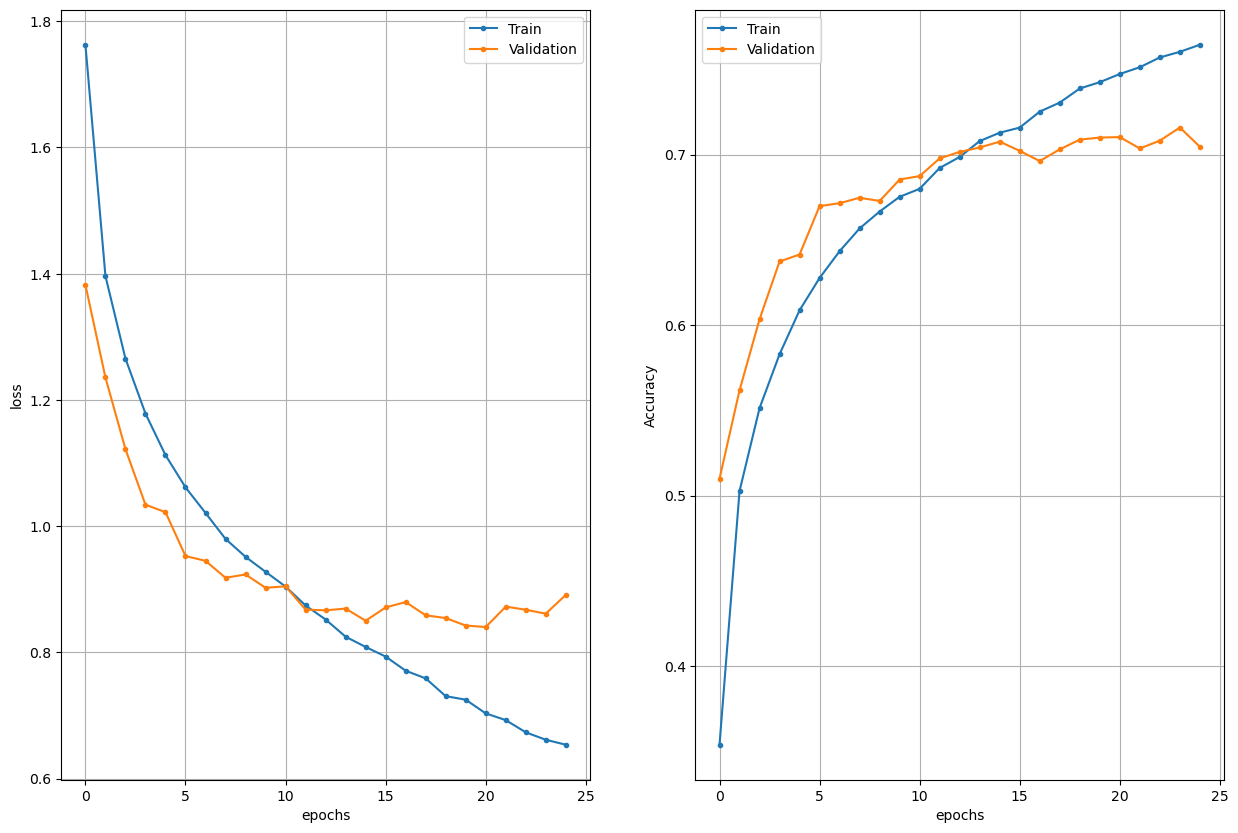

In [30]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [8]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)

y_pred_one_hot = model.predict(x_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

313/313 [==============================] - 0s 1ms/step


In [9]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    idx = np.where(y_true == class_id)
    
    true_labels_for_class = y_true[idx]
    pred_labels_for_class = y_pred[idx]
    
    correct_predictions = np.sum(pred_labels_for_class == class_id)
    
    total_samples = len(true_labels_for_class)
    
    if total_samples > 0:
        acc = correct_predictions / total_samples
    else:
        acc = 0.0
    print(class_name, acc)

plane 0.737
car 0.811
bird 0.516
cat 0.547
deer 0.712
dog 0.632
frog 0.794
horse 0.774
ship 0.809
truck 0.8


In [10]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.8530 - accuracy: 0.7132
Test loss   0.8530194163322449
Test metric 0.7131999731063843


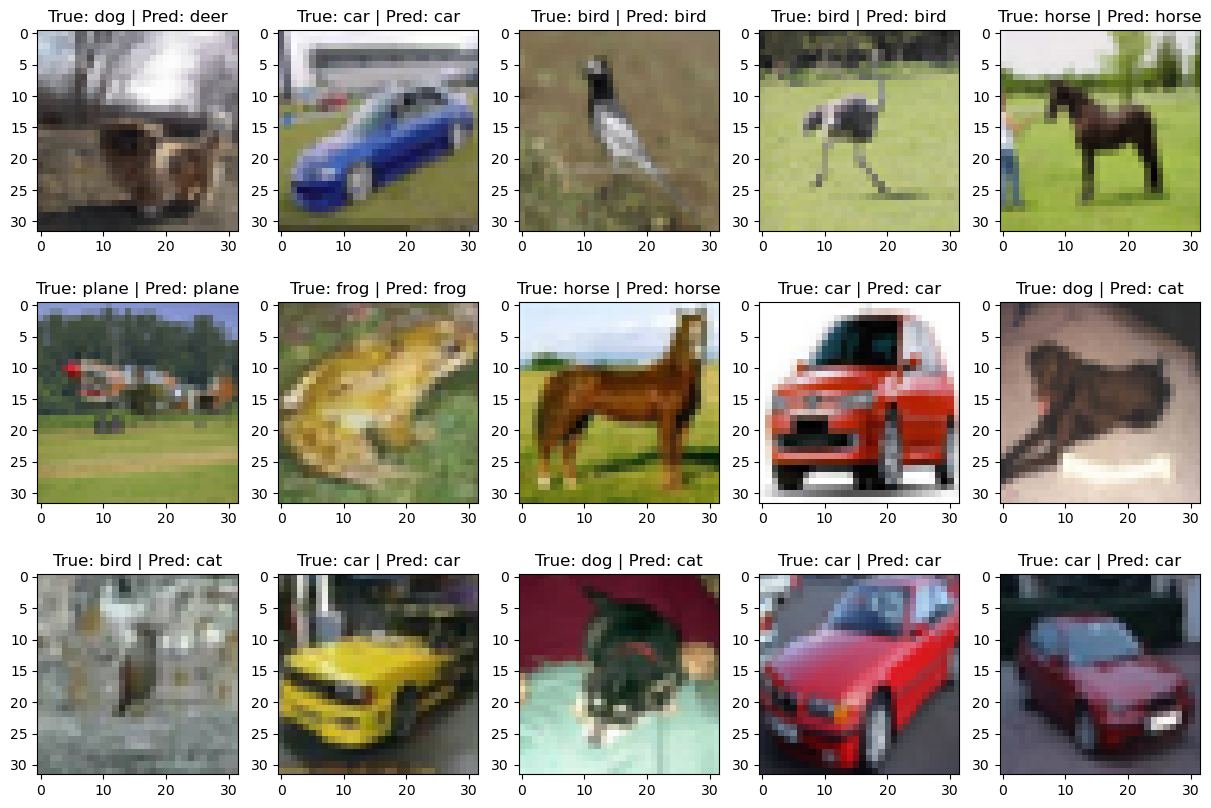

In [11]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
> 0.7132
* What modifications would you do in order to improve the classification accuracy?
> Збільшити кількість фільтрів на перед останньому шару.
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?
> Збільшив кількість фільтрів у шарі Dense з $128 \rightarrow 256$. Покращення точності з $71.31\% \rightarrow 73\%$.

In [54]:
# Build the classifier
model = Sequential([
    # Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten the 3D output to a 1D vector for the Dense layers
    Flatten(),
    
    # Fully Connected (Dense) Layers
    Dense(256, activation='relu'),
    # Dropout (optional, but good practice for regularization)
    Dropout(0.5), 
    
    # Output Layer: 10 units for 10 classes, using softmax
    Dense(num_classes, activation='softmax')
])


epochs = 25
batch_size = 128

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/25
391/391 [==============================] - 2s 3ms/step - loss: 1.6278 - accuracy: 0.4053 - val_loss: 1.3444 - val_accuracy: 0.5224
Epoch 2/25
391/391 [==============================] - 1s 3ms/step - loss: 1.3007 - accuracy: 0.5315 - val_loss: 1.1475 - val_accuracy: 0.6003
Epoch 3/25
391/391 [==============================] - 1s 3ms/step - loss: 1.1619 - accuracy: 0.5900 - val_loss: 1.0840 - val_accuracy: 0.6175
Epoch 4/25
391/391 [==============================] - 1s 3ms/step - loss: 1.0552 - accuracy: 0.6287 - val_loss: 1.0048 - val_accuracy: 0.6473
Epoch 5/25
391/391 [==============================] - 1s 3ms/step - loss: 0.9837 - accuracy: 0.6543 - val_loss: 0.9198 - val_accuracy: 0.6826
Epoch 6/25
391/391 [==============================] - 1s 3ms/step - loss: 0.9270 - accuracy: 0.6772 - val_loss: 0.8973 - val_accuracy: 0.6863
Epoch 7/25
391/391 [==============================] - 1s 3ms/step - loss: 0.8826 - accuracy: 0.6911 - val_loss: 0.8653 - val_accuracy: 0.6998
Epoch 

Train Acc      0.8486400246620178
Validation Acc 0.7300000190734863


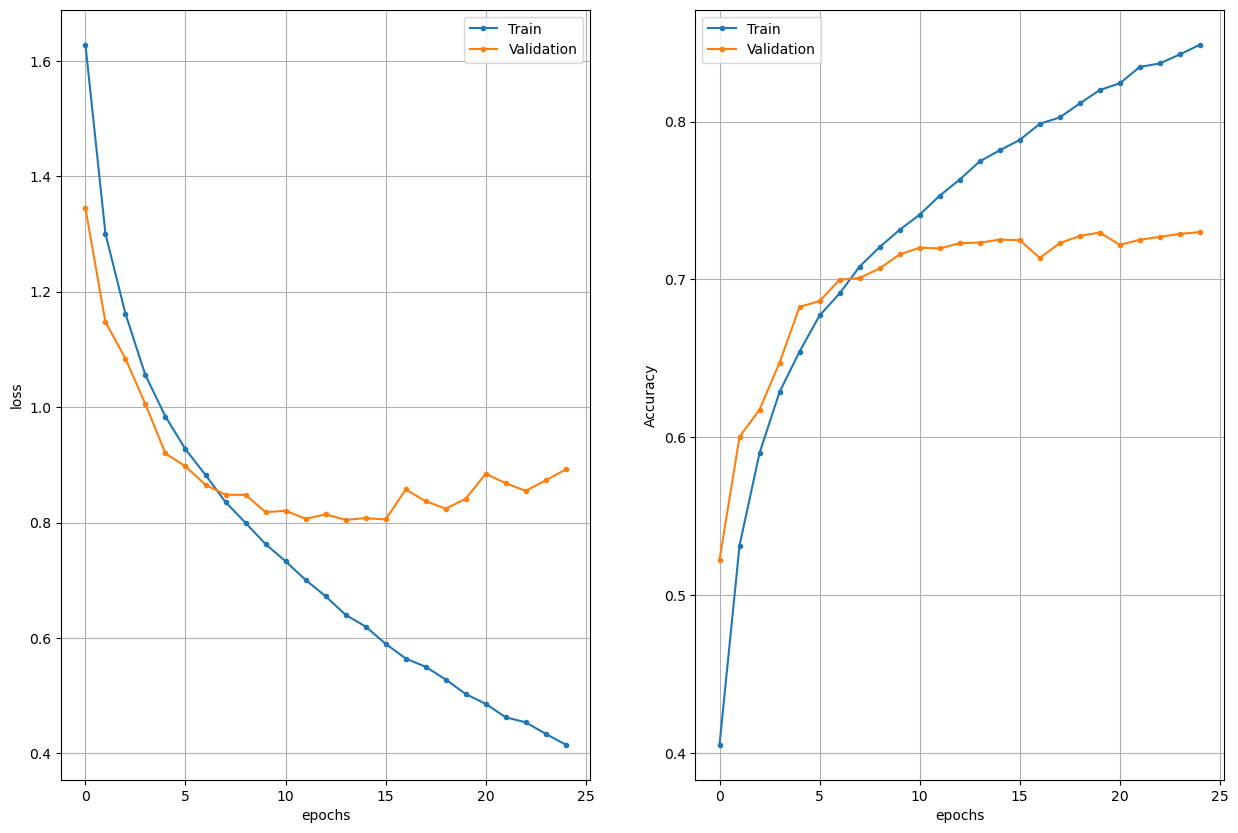

In [55]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])   

In [59]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)

y_pred_one_hot = model.predict(x_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

313/313 [==============================] - 0s 1ms/step


In [60]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    idx = np.where(y_true == class_id)
    
    true_labels_for_class = y_true[idx]
    pred_labels_for_class = y_pred[idx]
    
    correct_predictions = np.sum(pred_labels_for_class == class_id)
    
    total_samples = len(true_labels_for_class)
    
    if total_samples > 0:
        acc = correct_predictions / total_samples
    else:
        acc = 0.0
    print(class_name, acc)

plane 0.75
car 0.824
bird 0.603
cat 0.579
deer 0.69
dog 0.613
frog 0.789
horse 0.789
ship 0.829
truck 0.834


In [61]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.8921 - accuracy: 0.7300
Test loss   0.892063558101654
Test metric 0.7300000190734863


# Prac 08.2

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [62]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [63]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

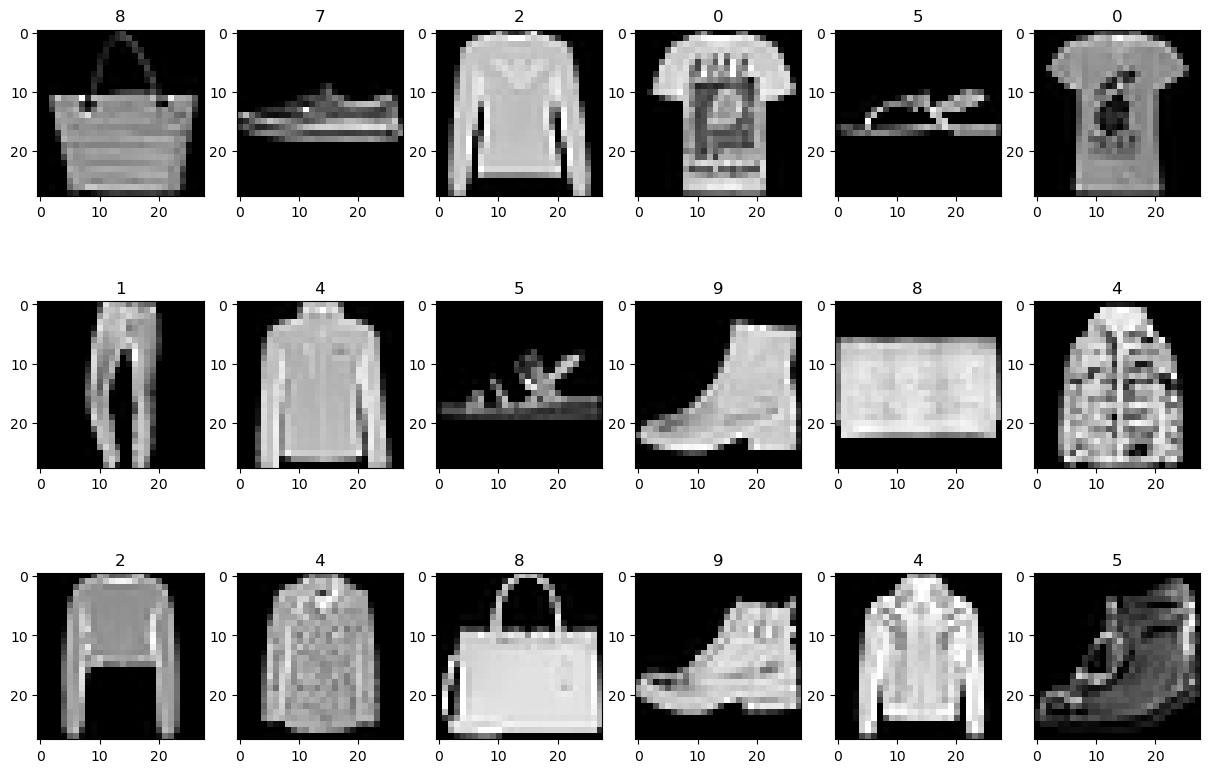

In [64]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [65]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [66]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 flatten_17 (Flatten)        (None, 25088)             0         
                                                                 
 dense_34 (Dense)            (None, 128)               3211392   
                                                                 
 dense_35 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [67]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 0.3924 - accuracy: 0.8623 - val_loss: 0.3315 - val_accuracy: 0.8810
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2734 - accuracy: 0.9032 - val_loss: 0.3015 - val_accuracy: 0.8914
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2329 - accuracy: 0.9156 - val_loss: 0.3136 - val_accuracy: 0.8906
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.2009 - accuracy: 0.9269 - val_loss: 0.3029 - val_accuracy: 0.8967
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1780 - accuracy: 0.9354 - val_loss: 0.3175 - val_accuracy: 0.8972
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1602 - accuracy: 0.9414 - val_loss: 0.3103 - val_accuracy: 0.9019
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.1406 - accuracy: 0.9488 - val_loss: 0.3357 - val_accuracy: 0.8985
Epoch 

Train Acc      0.9940000176429749
Validation Acc 0.8863999843597412


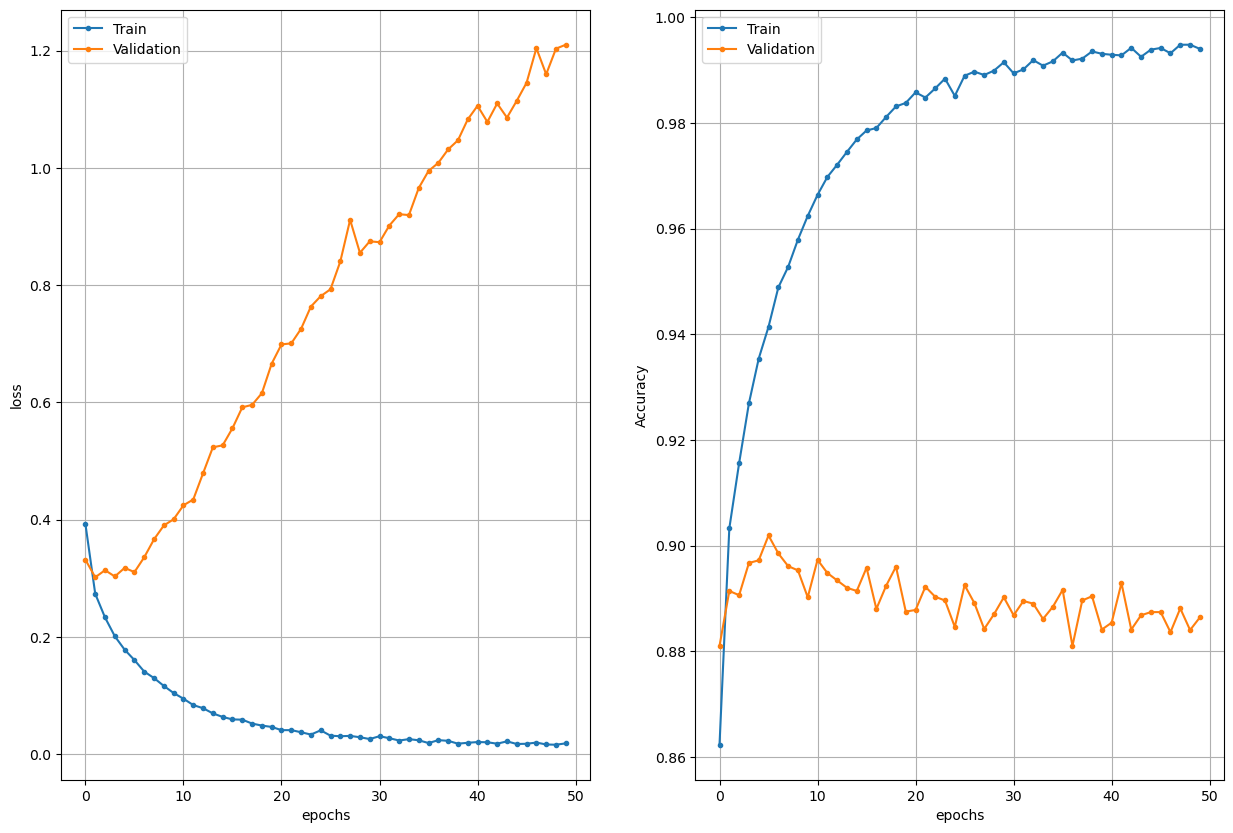

In [68]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [108]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D((2, 2))(net)

net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = Dropout(0.25)(net)

net = Flatten()(net)
net = Dense(128)(net)
net = Dropout(0.5)(net)

outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_63 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 12, 12, 32)        36896     
                                                                 
 dropout_31 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_32 (Flatten)        (None, 4608)              0         
                                                          

In [109]:
# Train the network
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.4554 - accuracy: 0.8379 - val_loss: 0.3301 - val_accuracy: 0.8806
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.3078 - accuracy: 0.8900 - val_loss: 0.2769 - val_accuracy: 0.9011
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2714 - accuracy: 0.9022 - val_loss: 0.2664 - val_accuracy: 0.9049
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2479 - accuracy: 0.9105 - val_loss: 0.2502 - val_accuracy: 0.9113
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2312 - accuracy: 0.9173 - val_loss: 0.2409 - val_accuracy: 0.9123
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2175 - accuracy: 0.9215 - val_loss: 0.2366 - val_accuracy: 0.9142
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.2096 - accuracy: 0.9244 - val_loss: 0.2446 - val_accuracy: 0.9145
Epoch 

Train Acc      0.9697666764259338
Validation Acc 0.9214000105857849


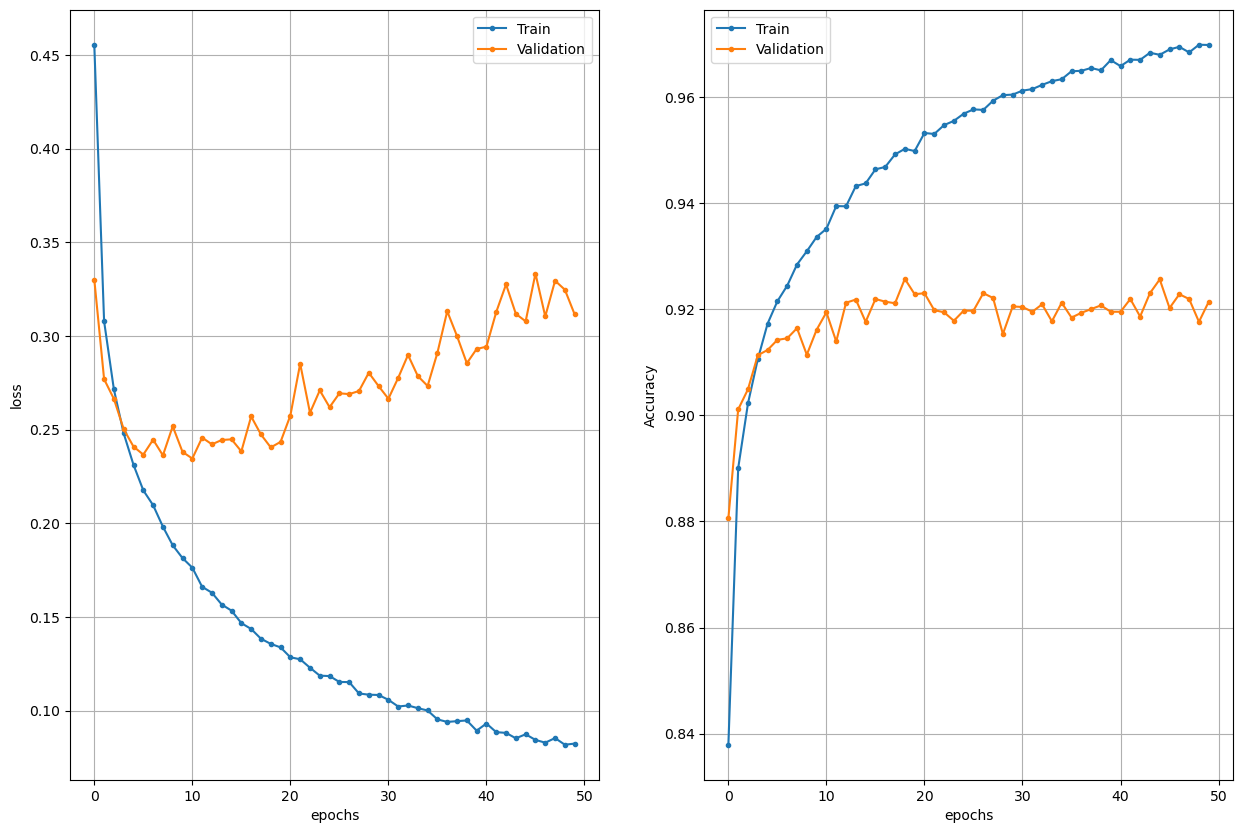

In [110]:
# Show the results

plot_history(history)

### Questions

* What have you done in order to improve the performance?
> Додав ще один згортковий шар, макспулінг та 2 дропаута.
* Have you tried configurations that did not work out?
> Надто велика кількість шарів макспулінгу показала, навпаки, гірший результат.